In [1]:
import numpy as np
import matplotlib.pyplot as plt
import re
from matplotlib.ticker import FormatStrFormatter

In [2]:
def open_data(sys):
    A = []
    A_mean = np.zeros([3])
    for r in range(1,4):
        f = open('ORDER_PER_BOND/{0:s}_v{1:d}_nowat_order.dat'.format(sys, r)).readlines()
        bond_names = f[0].split()[1:]
        for line in f:
            if re.match('average', line):
                ava = np.array(line.split()[1:], dtype=float)
                A.append(ava)
                A_mean[r-1] = np.mean(ava)
    return A, A_mean, bond_names

In [3]:
systems_1D1 = ['1D1_60', '1D1_65', '1D1_70', '1D1_75', '1D1_80', '1D1_85', '1D1_90']
systems_NW11 = ['NW11_70', 'NW11_80', 'NW11_90', 'NW11_99', 'NW11_110']
systems = ['1D1_60', '1E3D1_134', 'NW9_54', 'NW11_70', 'NWLA_150']

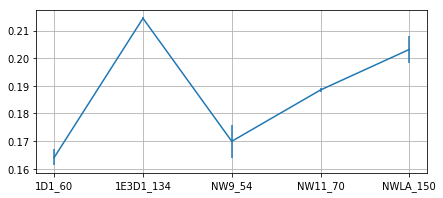

In [4]:
plt.figure(figsize=[7,3])
M = np.zeros([len(systems)])
S = np.zeros([len(systems)])
for idx, s in enumerate(systems):
    A, mean, bond_names = open_data(s)
    M[idx] =  np.mean(mean)
    S[idx] =  np.std(mean)
plt.errorbar([1,2,3,4,5], M, yerr=S)
plt.xticks([1,2,3,4,5], systems, fontsize=10)
plt.yticks(fontsize=10)
plt.grid()

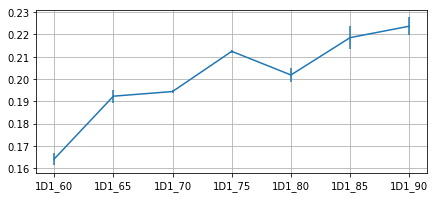

In [173]:
plt.figure(figsize=[7,3])
M_1D1 = np.zeros([len(systems_1D1)])
S_1D1 = np.zeros([len(systems_1D1)])
for idx, s in enumerate(systems_1D1):
    A, mean, bond_names = open_data(s)
    M_1D1[idx] =  np.mean(mean)
    S_1D1[idx] =  np.std(mean)
plt.errorbar([1,2,3,4,5,6,7], M_1D1, yerr=S_1D1)
plt.xticks([1,2,3,4,5,6,7], systems_1D1, fontsize=10)
plt.yticks(fontsize=10)
plt.grid()

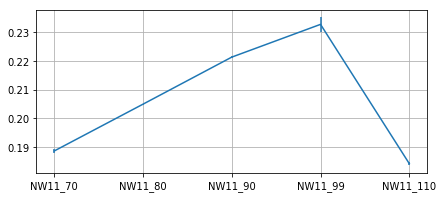

In [174]:
plt.figure(figsize=[7,3])
M_NW11 = np.zeros([len(systems_NW11)])
S_NW11 = np.zeros([len(systems_NW11)])
for idx, s in enumerate(systems_NW11):
    A, mean, bond_names = open_data(s)
    M_NW11[idx] =  np.mean(mean)
    S_NW11[idx] =  np.std(mean)
plt.errorbar([1,2,3,4,5], M_NW11, yerr=S_NW11)
plt.xticks([1,2,3,4,5], systems_NW11, fontsize=10)
plt.yticks(fontsize=10)
plt.grid()

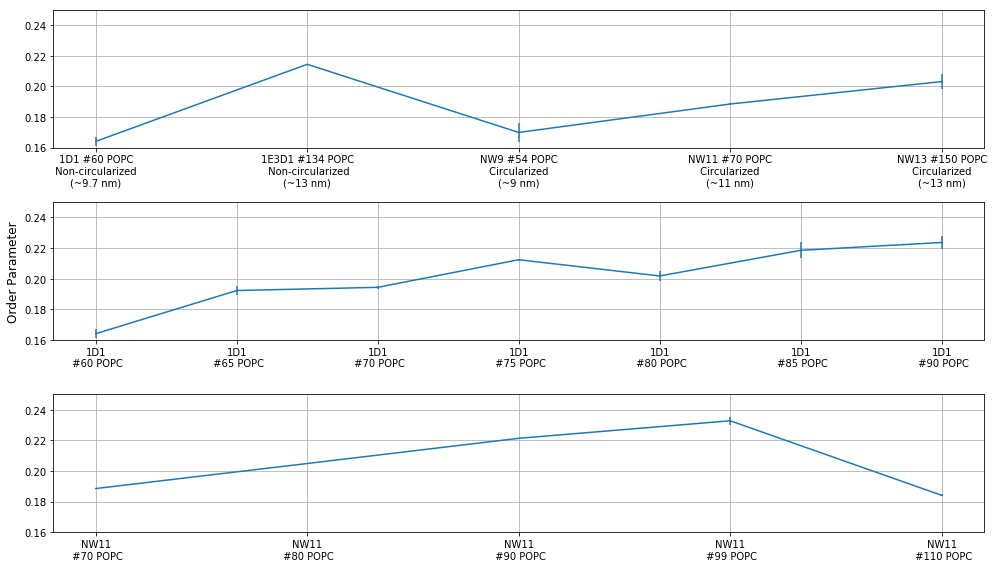

In [240]:
labels=('1D1 #60 POPC\n Non-circularized \n(~9.7 nm)','1E3D1 #134 POPC\n Non-circularized\n(~13 nm)', 'NW9 #54 POPC\n Circularized \n(~9 nm)', 'NW11 #70 POPC\n Circularized \n(~11 nm)', 'NW13 #150 POPC\n Circularized \n(~13 nm)')
labels_1D1=('1D1\n #60 POPC','1D1\n #65 POPC','1D1\n #70 POPC','1D1\n #75 POPC','1D1\n #80 POPC','1D1\n #85 POPC', '1D1\n #90 POPC')
labels_NW11=('NW11\n #70 POPC','NW11\n #80 POPC','NW11\n #90 POPC','NW11\n #99 POPC', 'NW11\n #110 POPC')

fig, axs = plt.subplots(3, 1, figsize=(14,8), sharey=True)
axs[2].errorbar([1,2,3,4,5], M_NW11, yerr=S_NW11)
axs[1].errorbar([1,2,3,4,5,6,7], M_1D1, yerr=S_1D1)
axs[0].errorbar([1,2,3,4,5], M, yerr=S)

axs[0].set_ylim(0.16, 0.25)
axs[0].set_xticks([1,2,3,4,5])
axs[2].set_xticklabels(labels_NW11, fontsize=10)
axs[0].grid()
#axs[0].set_ylabel('Order Parameter', fontsize=12)

axs[1].set_xticks([1,2,3,4,5,6,7])
axs[1].set_xticklabels(labels_1D1, fontsize=10)
axs[1].grid()
axs[1].set_ylabel('Order Parameter', fontsize=12)

axs[2].set_xticks([1,2,3,4,5])
axs[0].set_xticklabels(labels, fontsize=10)
axs[2].grid()

fig.tight_layout()
#axs[2].set_ylabel('Order Parameter', fontsize=12)
#axs[0].set_title('NW11', fontsize=12)
#axs[1].set_title('1D1', fontsize=12)
fig.savefig('Average_OrderParameter.png', dpi=600)

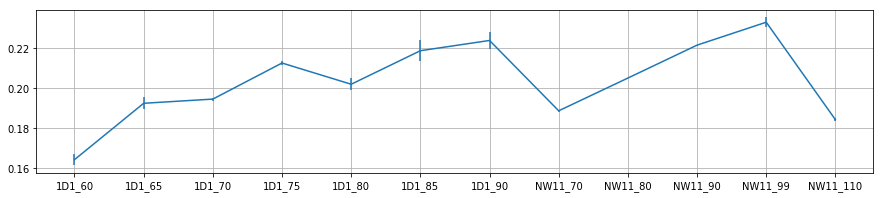

In [187]:
M_both = np.concatenate((M_1D1, M_NW11))
S_both = np.concatenate((S_1D1, S_NW11))
plt.figure(figsize=[15,3])
plt.errorbar([1,2,3,4,5,6,7,8,9,10,11,12], M_both, yerr=S_both)
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12], np.concatenate((systems_1D1, systems_NW11)))
plt.grid()

(0.15, 0.24)

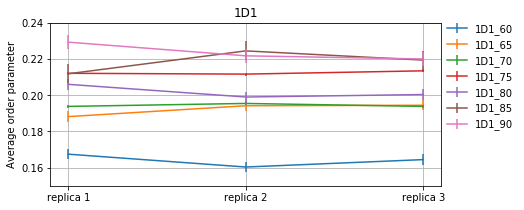

In [153]:
plt.figure(figsize=[7,3])
for s in systems_1D1:
    A, mean, bond_names = open_data(s)
    plt.errorbar([1,2,3], mean, yerr=np.std(mean), label=s, barsabove=True)
plt.grid()
plt.xticks([1,2,3], ['replica 1', 'replica 2', 'replica 3'], fontsize=10)
plt.ylabel('Average order parameter', fontsize=10)
plt.legend(loc='upper center', bbox_to_anchor=(1.1, 1.05), frameon=False, fontsize=10)
plt.title('1D1')
plt.ylim(0.15,0.24)

(0.15, 0.24)

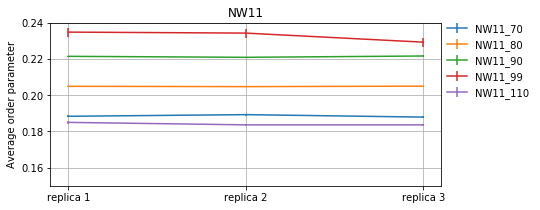

In [156]:
plt.figure(figsize=[7,3])
for s in systems_NW11:
    A, mean, bond_names = open_data(s)
    plt.errorbar([1,2,3], mean, yerr=np.std(mean), label=s, barsabove=True)
plt.grid()
plt.xticks([1,2,3], ['replica 1', 'replica 2', 'replica 3'], fontsize=10)
plt.ylabel('Average order parameter', fontsize=10)
plt.legend(loc='upper center', bbox_to_anchor=(1.12, 1.05), frameon=False, fontsize=10)
plt.title('NW11')
plt.ylim(0.15,0.24)

In [95]:
name='1D1_60'
A, mean, bond_names = open_data(name)

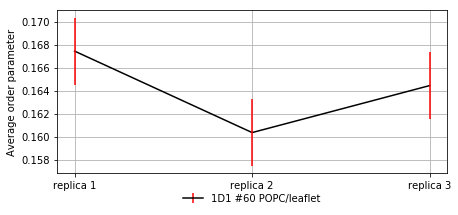

In [123]:
plt.figure(figsize=[7,3])
plt.errorbar([1,2,3], mean, yerr=np.std(mean), color='black', ecolor='red', label='1D1 #60 POPC/leaflet', barsabove=True)
plt.grid()
plt.xticks([1,2,3], ['replica 1', 'replica 2', 'replica 3'], fontsize=10)
plt.ylabel('Average order parameter', fontsize=10)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.07), frameon=False, fontsize=10)

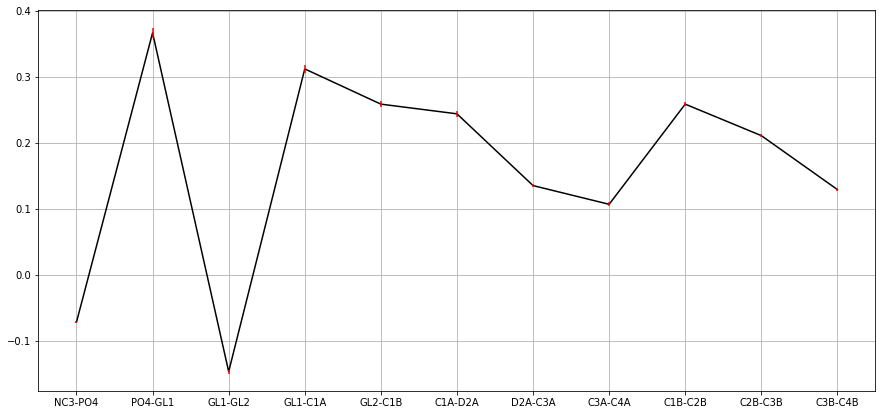

In [93]:
plt.figure(figsize=[15,7])
plt.errorbar(range(len(bond_names)), np.mean(np.array(A), axis=0), yerr=np.std(np.array(A), axis=0), barsabove=True, ecolor='red', color='black')
plt.xticks(range(len(bond_names)), bond_names, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True)
plt.savefig(name+'average_order_parameter.png')

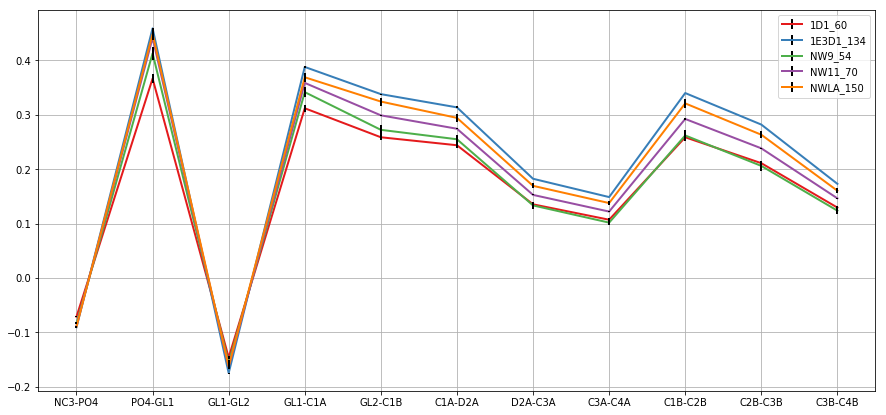

In [9]:
systems = ['1D1_60', '1E3D1_134', 'NW9_54', 'NW11_70', 'NWLA_150']
color_list = ['#e41a1c','#377eb8','#4daf4a','#984ea3', '#ff7f00']


plt.figure(figsize=[15,7])
for idx, s in enumerate(systems):
    A, mean, bond_names = open_data(s)
    plt.errorbar(range(len(bond_names)), np.mean(np.array(A), axis=0), yerr=np.std(np.array(A), axis=0), barsabove=True, ecolor='black', color=color_list[idx], label=s, linewidth=2)
plt.xticks(range(len(bond_names)), bond_names, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True)
plt.legend(loc='best')
plt.savefig('Average_order_parameter.png')

In [10]:
for idx, s in enumerate(systems):
    A, mean, bond_names = open_data(s)
    print mean

[0.16745455 0.16036364 0.16445455]
[0.21418182 0.21418182 0.215     ]
[0.17309091 0.16154545 0.17518182]
[0.18836364 0.18927273 0.18790909]
[0.19618182 0.207      0.20636364]
